In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train.csv')
stores_df = pd.read_csv('stores.csv')
features_df = pd.read_csv('features.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## 1. Data Visualization

### 1.1 Analysing Weekly Sales

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

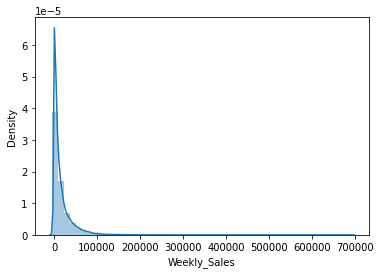

In [3]:
sns.distplot(train_df['Weekly_Sales'])

* Let's zoom in a little bit

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

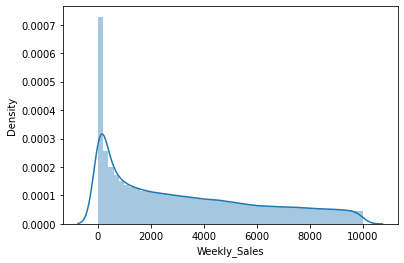

In [6]:
sns.distplot(train_df[(train_df['Weekly_Sales'] > 0) & (train_df['Weekly_Sales'] <= 10000)]['Weekly_Sales'])

* It can be seen that the distribution of target variable follows some sort of power law distribution.
* We'll transform this distribution into Normal using Box-Cox and try to predict the values of the transformed Normal Distribution.
* Later we'll convert this Normal distribution back to its original form.
* Also there are outliers in this distribution with values less than or equal to 0, unable to understand why is it so!

In [10]:
train_df.loc[train_df['Weekly_Sales'] <= 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday
846,1,6,2012-08-10,-139.65,False
2384,1,18,2012-05-04,-1.27,False
6048,1,47,2010-02-19,-863.00,False
6049,1,47,2010-03-12,-698.00,False
6051,1,47,2010-10-08,-58.00,False
...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True
419598,45,80,2010-02-19,-0.27,False
419603,45,80,2010-04-16,-1.61,False
419614,45,80,2010-07-02,-0.27,False


In [16]:
print("Percentage of Outliers : ",((train_df[train_df['Weekly_Sales'] <= 0].shape[0]*100)/len(train_df)))

Percentage of Outliers :  0.3221291837654482


* Percentage of Outliers seems to be less
* Now Let's apply Box-Cox Transformation to this Power Distribution

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

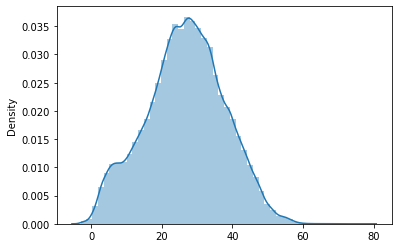

In [11]:
from scipy import stats
trans_weekly_sales,lparam = stats.boxcox(train_df[train_df['Weekly_Sales'] > 0]['Weekly_Sales'])
sns.distplot(trans_weekly_sales)

* Transforming the distribution back to original form

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

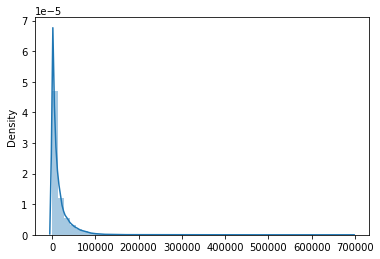

In [14]:
original_series = np.exp(np.log(trans_weekly_sales * lparam + 1)/lparam)
sns.distplot(original_series)

### 1.2 Analysing train dataframe

### 1.2.1 Relationship between store & weekly_sales 

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

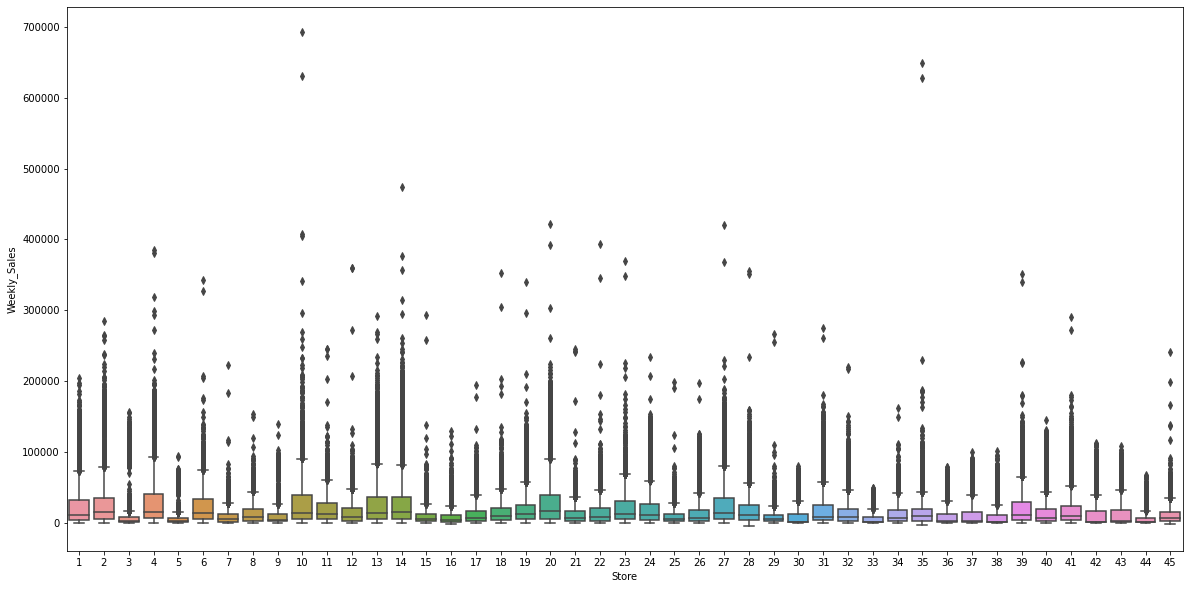

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot('Store','Weekly_Sales',data=train_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

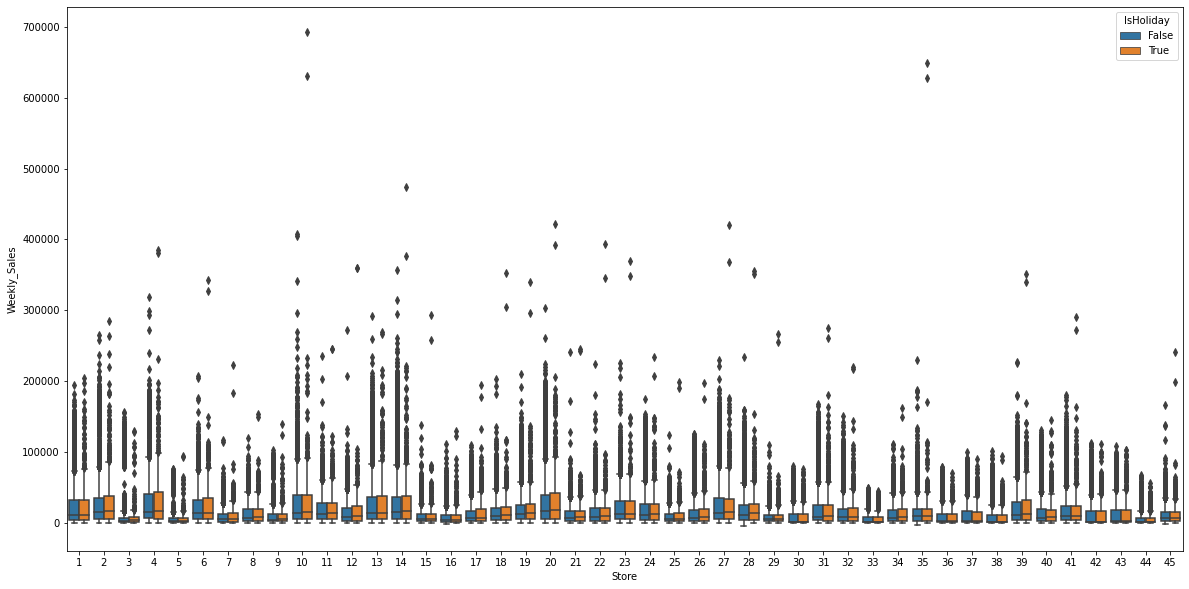

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot('Store','Weekly_Sales',hue='IsHoliday',data=train_df)

### 1.2.2 Relationship between Dept and Weekly Sales

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

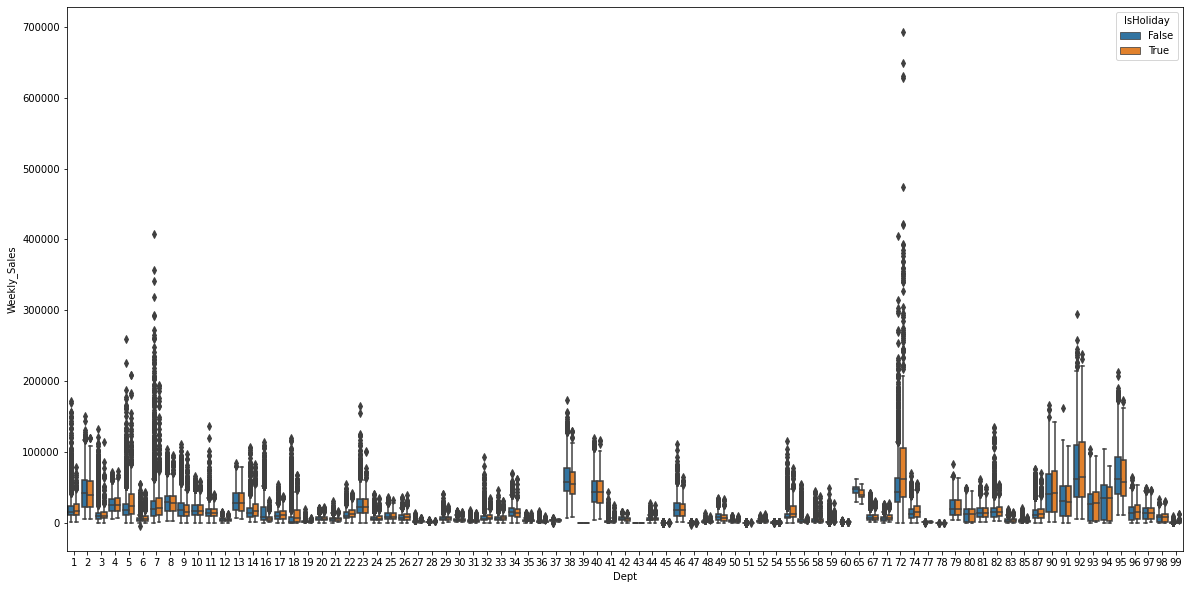

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot('Dept','Weekly_Sales',hue='IsHoliday',data=train_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

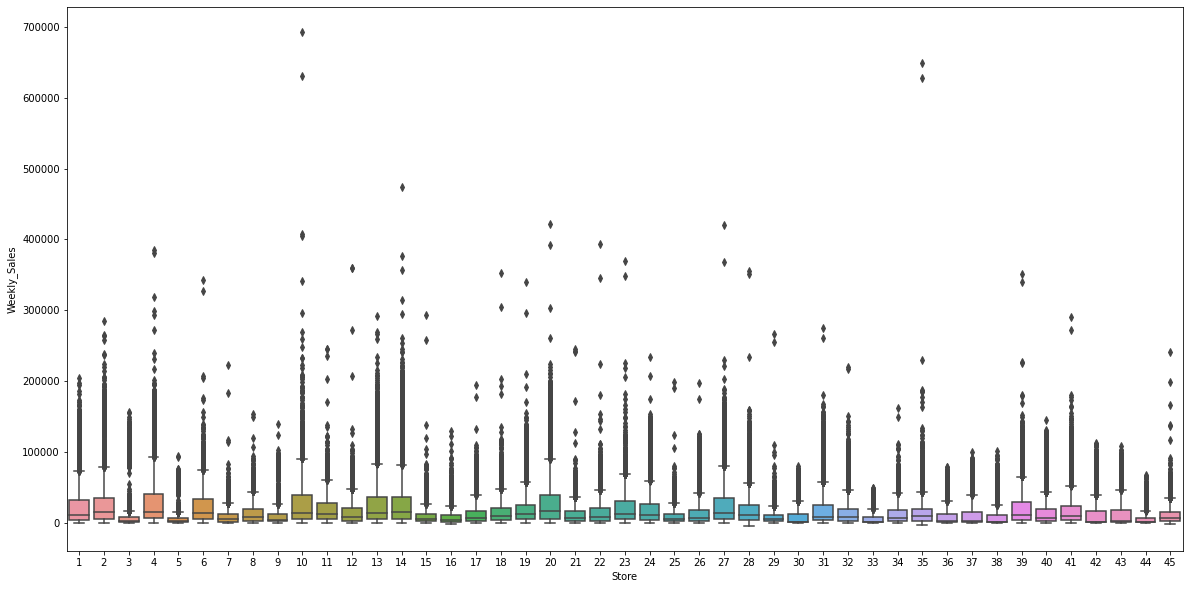

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot('Store','Weekly_Sales',data=train_df)

In [11]:
train_df.Date = pd.to_datetime(train_df.Date)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [12]:
train_df['month'] = train_df.Date.dt.month
train_df['day'] = train_df.Date.dt.day
train_df['year'] = train_df.Date.dt.year
train_df['week'] = train_df.Date.dt.week

<ipython-input-12-c0fe6cdbbb02>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['week'] = train_df.Date.dt.week


In [13]:
train_df['day_of_week'] = train_df.Date.dt.dayofweek

In [14]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,month,day,year,week,day_of_week
0,1,1,2010-02-05,24924.50,False,2,5,2010,5,4
1,1,1,2010-02-12,46039.49,True,2,12,2010,6,4
2,1,1,2010-02-19,41595.55,False,2,19,2010,7,4
3,1,1,2010-02-26,19403.54,False,2,26,2010,8,4
4,1,1,2010-03-05,21827.90,False,3,5,2010,9,4


C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='Weekly_Sales'>

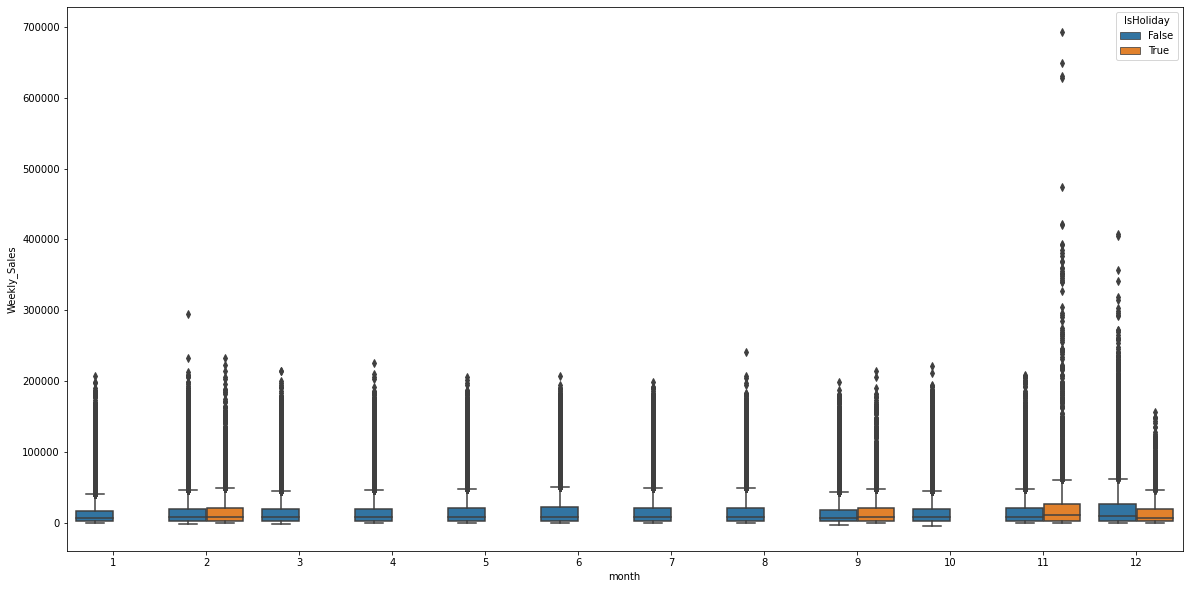

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot('month','Weekly_Sales',hue='IsHoliday',data=train_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='Weekly_Sales'>

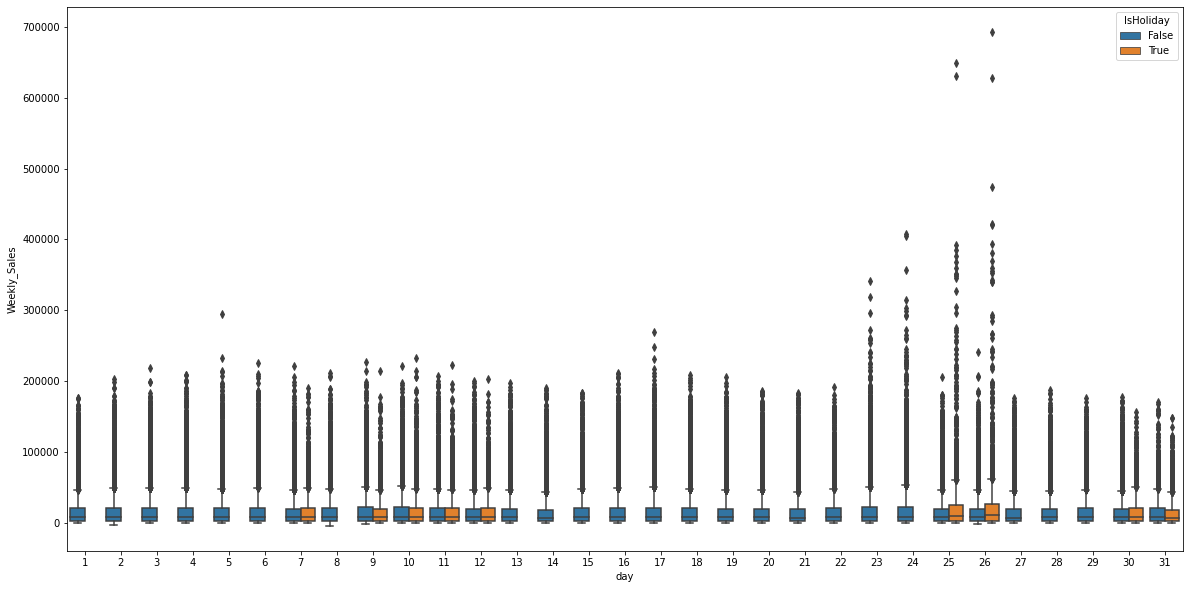

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot('day','Weekly_Sales',hue='IsHoliday',data=train_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

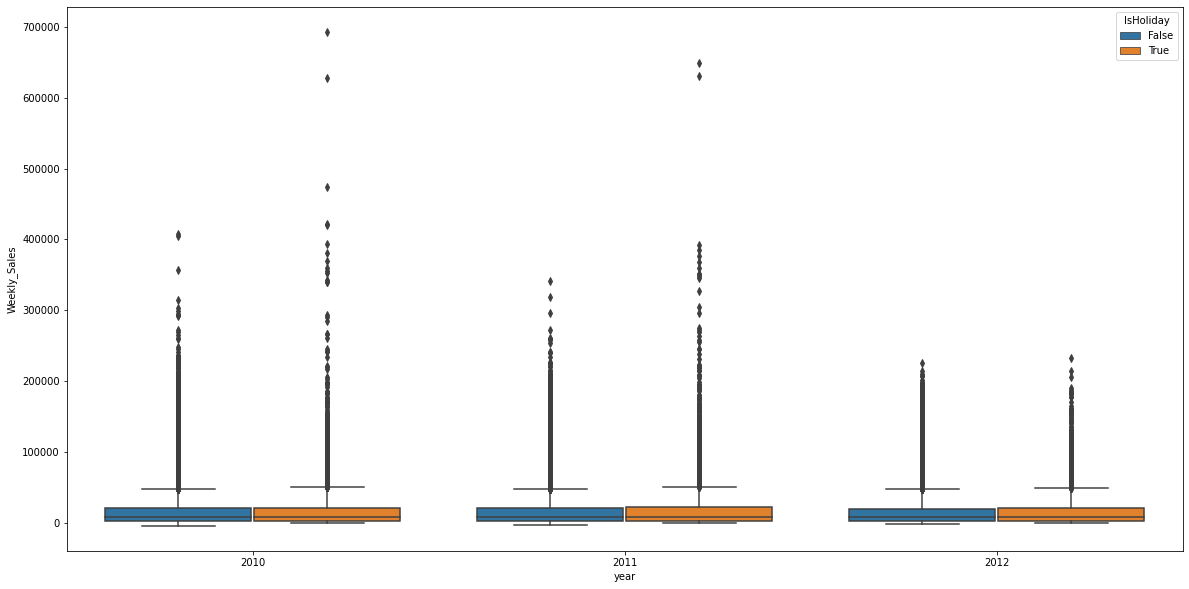

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot('year','Weekly_Sales',hue='IsHoliday',data=train_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='Weekly_Sales'>

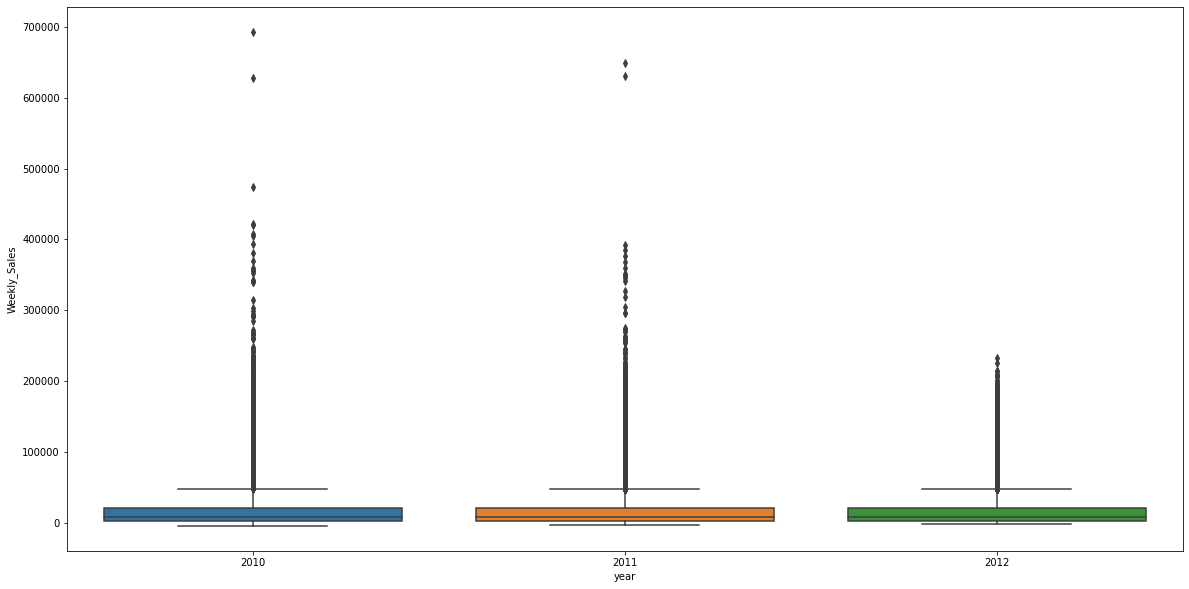

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot('year','Weekly_Sales',data=train_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

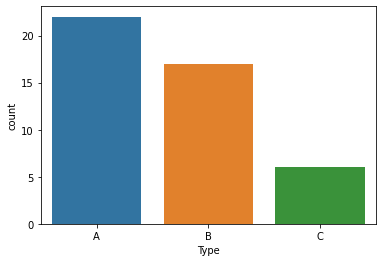

In [19]:
sns.countplot(stores_df.Type)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size', ylabel='count'>

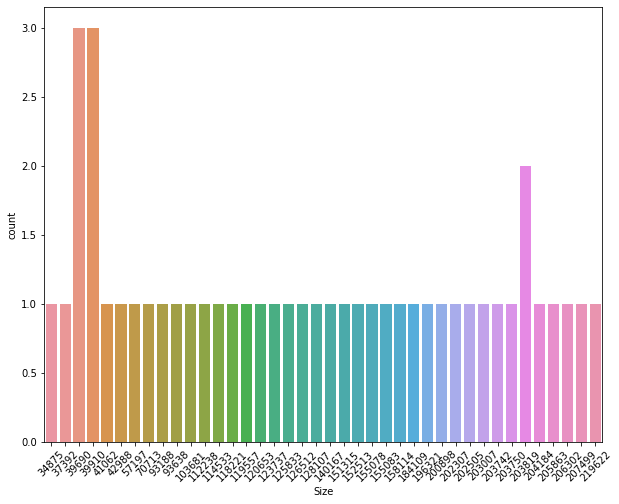

In [20]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(stores_df.Size)

In [27]:
train_store_df = train_df.merge(stores_df,left_on='Store',right_on='Store')

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

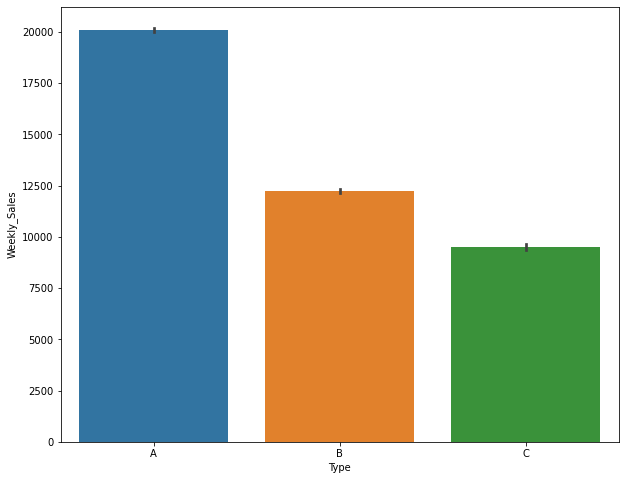

In [31]:
plt.figure(figsize=(10,8))
sns.barplot('Type','Weekly_Sales',data=train_store_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

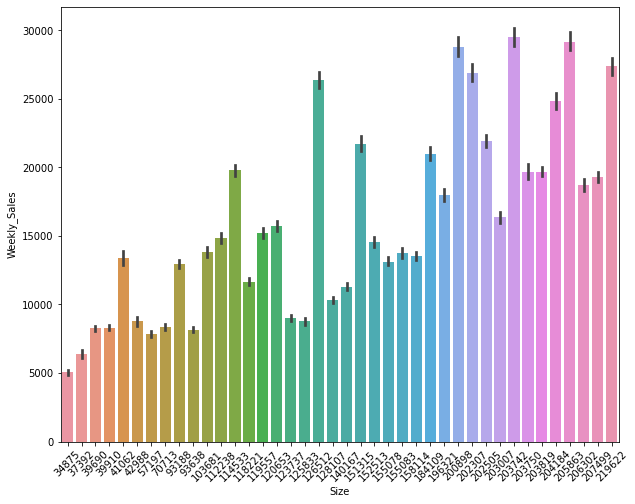

In [33]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.barplot('Size','Weekly_Sales',data=train_store_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

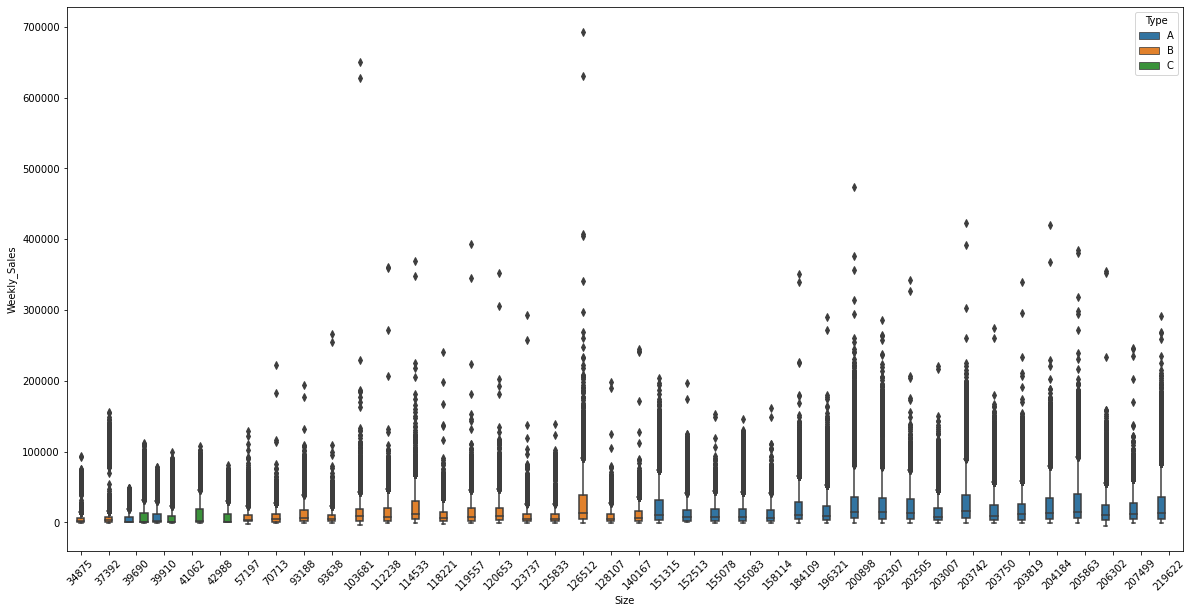

In [37]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot('Size','Weekly_Sales', 
            hue = 'Type',
            data=train_store_df)

* Type A has larger size stores.
* Type B has medium size stores.
* Type C has smaller size stores.

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

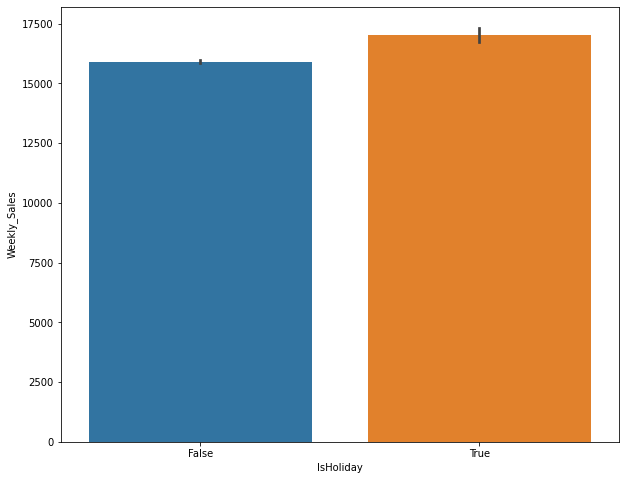

In [39]:
plt.figure(figsize=(10,8))
sns.barplot('IsHoliday','Weekly_Sales',data=train_store_df)

In [42]:
features_df.isnull().sum()*100/features_df.shape[0]

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

More than 50% of the markdown columns are empty

In [46]:
train_features_df = train_df[['Store','Weekly_Sales']].merge(features_df,left_on='Store',right_on='Store')

In [56]:
features_df.Date = pd.to_datetime(features_df.Date)

In [64]:
features_df['day'] = features_df.Date.dt.day

In [65]:
features_df['week'] = features_df.Date.dt.week

<ipython-input-65-365c7dfc53af>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  features_df['week'] = features_df.Date.dt.week


In [66]:
features_df['month'] = features_df.Date.dt.month

In [67]:
features_df['year'] = features_df.Date.dt.year

In [68]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  day           8190 non-null   int64         
 13  week          8190 non-null   int64         
 14  month         8190 non-null   int64         
 15  year          8190 non-null   int64   

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Temperature'>

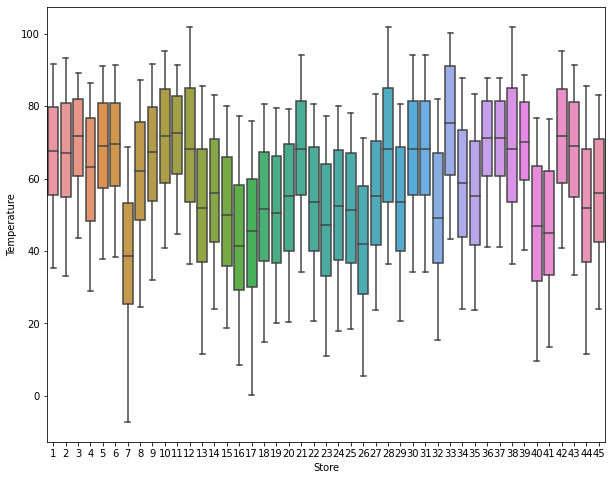

In [70]:
plt.figure(figsize=(10,8))
sns.boxplot('Store','Temperature',data=features_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fuel_Price', ylabel='Density'>

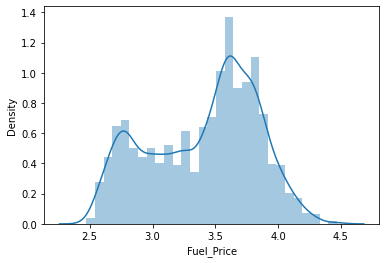

In [5]:
sns.distplot(features_df.Fuel_Price)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='Fuel_Price'>

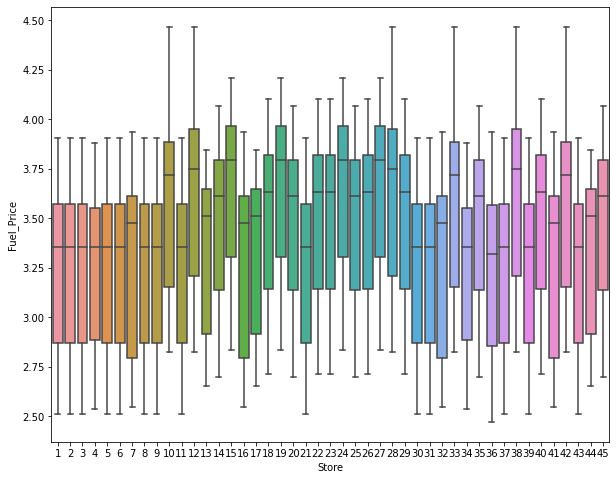

In [3]:
plt.figure(figsize=(10,8))
sns.boxplot('Store','Fuel_Price',data=features_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

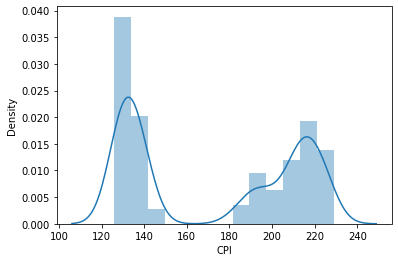

In [4]:
sns.distplot(features_df.CPI)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store', ylabel='CPI'>

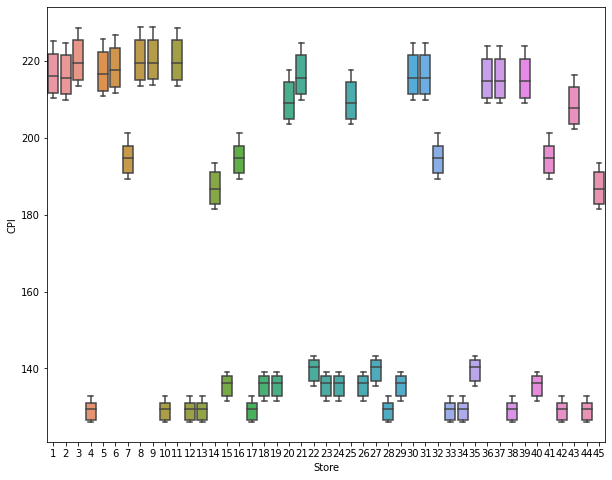

In [6]:
plt.figure(figsize=(10,8))
sns.boxplot('Store','CPI',data=features_df)

In [7]:
features_df['cpi_bin'] = features_df['CPI'] >= 180

In [23]:
merge_df = pd.merge(features_df[['Store','cpi_bin']],train_df[['Store','Weekly_Sales']],on='Store',how='inner')

In [25]:
del(merge_df)

In [26]:
features_df.Store.nunique() == train_df.Store.nunique()

True

In [31]:
test1_df = pd.DataFrame({'id' : [1,1,2,2,3,3,4,4,5,5],
                         'val' : [10,20,30,40,50,60,70,80,90,100]})
test2_df = pd.DataFrame({'id' : [1,2,3,4,5],
                        'val' : [10,20,30,40,50]})
test_df = pd.merge(test1_df,test2_df,on='id',how='left')

In [34]:
train_df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [35]:
features_df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [56]:
temp_df = pd.merge(train_df[['Store','Weekly_Sales']],stores_df,on='Store',how='left').drop_duplicates()

In [57]:
temp_df.head()

,Store,Weekly_Sales,Type,Size
0,1,24924.50,A,151315
1,1,46039.49,A,151315
2,1,41595.55,A,151315
3,1,19403.54,A,151315
4,1,21827.90,A,151315


C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

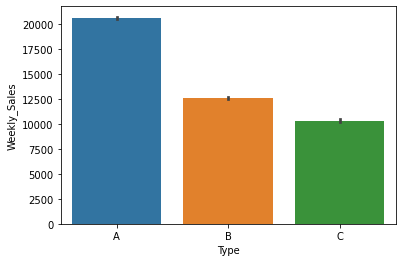

In [64]:
sns.barplot('Type','Weekly_Sales',data=temp_df)

* Create Numerical Aggregation over feature columns and then try to correlate with Weekly Sales

In [4]:
def createNumericalAggr(df,groupby_cat,num_feat):
    """
        Input : 
            df : DataFrame to be used for operation
    groupby_cat: Column to be used for groupby
       num_feat: Feature across which aggregation will be performed 
    
    returns aggregated features with min,max,median,sum and standard-deviation
    """
    
    aggr_funcs = ['min','max','median','sum','std','skew']
    aggr_dict = {num_feat : aggr_funcs}
    aggr_df = df.groupby([groupby_cat]).agg(aggr_dict).reset_index()
    aggr_df.columns = ['_'.join(col).strip('_') for col in aggr_df.columns.values]
    return aggr_df

In [5]:
aggr_df = pd.DataFrame()
float_cols = features_df.select_dtypes('float64').columns
for col in float_cols:
    aggr_df = pd.concat([aggr_df,createNumericalAggr(features_df,'Store',col)],axis=1)

aggr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                45 non-null     int64  
 1   Temperature_min      45 non-null     float64
 2   Temperature_max      45 non-null     float64
 3   Temperature_median   45 non-null     float64
 4   Temperature_sum      45 non-null     float64
 5   Temperature_std      45 non-null     float64
 6   Temperature_skew     45 non-null     float64
 7   Store                45 non-null     int64  
 8   Fuel_Price_min       45 non-null     float64
 9   Fuel_Price_max       45 non-null     float64
 10  Fuel_Price_median    45 non-null     float64
 11  Fuel_Price_sum       45 non-null     float64
 12  Fuel_Price_std       45 non-null     float64
 13  Fuel_Price_skew      45 non-null     float64
 14  Store                45 non-null     int64  
 15  MarkDown1_min        45 non-null     float

In [31]:
aggr_df.head()

,Store,Temperature_min,Temperature_max,Temperature_median,Temperature_sum,Temperature_std,Temperature_skew,Store,Fuel_Price_min,Fuel_Price_max,...,CPI_sum,CPI_std,CPI_skew,Store,Unemployment_min,Unemployment_max,Unemployment_median,Unemployment_sum,Unemployment_std,Unemployment_skew
0,1,35.40,91.65,67.510,12177.99,14.134829,-0.221978,1,2.514,3.907,...,36718.913780,5.004205,0.079960,1,6.314,8.106,7.742,1257.528,0.533324,-0.740340
1,2,33.02,93.34,67.025,12144.57,15.308429,-0.157916,2,2.514,3.907,...,36659.250111,4.994412,0.079797,2,6.112,8.324,7.852,1251.269,0.766789,-0.458678
2,3,43.57,89.12,71.865,12811.74,12.459863,-0.318212,3,2.514,3.907,...,37296.630674,5.099049,0.081499,3,5.999,7.574,7.343,1184.015,0.575426,-0.608988
3,4,28.84,86.29,63.175,11177.83,15.927107,-0.198655,4,2.540,3.881,...,21834.308451,2.106568,-0.179480,4,3.879,8.623,5.644,954.419,1.504749,0.389709
4,5,37.74,91.07,69.065,12416.86,13.998336,-0.244982,5,2.514,3.907,...,36815.696249,5.020091,0.080223,5,5.278,6.768,6.465,1041.575,0.473794,-0.460181


In [6]:
aggr_df = aggr_df.loc[:,~aggr_df.columns.duplicated()]

In [34]:
aggr_df = pd.merge(train_df[['Store','Weekly_Sales']],aggr_df,how='left',on='Store')

In [35]:
aggr_df.head()

,Store,Weekly_Sales,Temperature_min,Temperature_max,Temperature_median,Temperature_sum,Temperature_std,Temperature_skew,Fuel_Price_min,Fuel_Price_max,...,CPI_median,CPI_sum,CPI_std,CPI_skew,Unemployment_min,Unemployment_max,Unemployment_median,Unemployment_sum,Unemployment_std,Unemployment_skew
0,1,24924.50,35.4,91.65,67.51,12177.99,14.134829,-0.221978,2.514,3.907,...,216.041053,36718.91378,5.004205,0.07996,6.314,8.106,7.742,1257.528,0.533324,-0.74034
1,1,46039.49,35.4,91.65,67.51,12177.99,14.134829,-0.221978,2.514,3.907,...,216.041053,36718.91378,5.004205,0.07996,6.314,8.106,7.742,1257.528,0.533324,-0.74034
2,1,41595.55,35.4,91.65,67.51,12177.99,14.134829,-0.221978,2.514,3.907,...,216.041053,36718.91378,5.004205,0.07996,6.314,8.106,7.742,1257.528,0.533324,-0.74034
3,1,19403.54,35.4,91.65,67.51,12177.99,14.134829,-0.221978,2.514,3.907,...,216.041053,36718.91378,5.004205,0.07996,6.314,8.106,7.742,1257.528,0.533324,-0.74034
4,1,21827.90,35.4,91.65,67.51,12177.99,14.134829,-0.221978,2.514,3.907,...,216.041053,36718.91378,5.004205,0.07996,6.314,8.106,7.742,1257.528,0.533324,-0.74034


C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_median', ylabel='Weekly_Sales'>

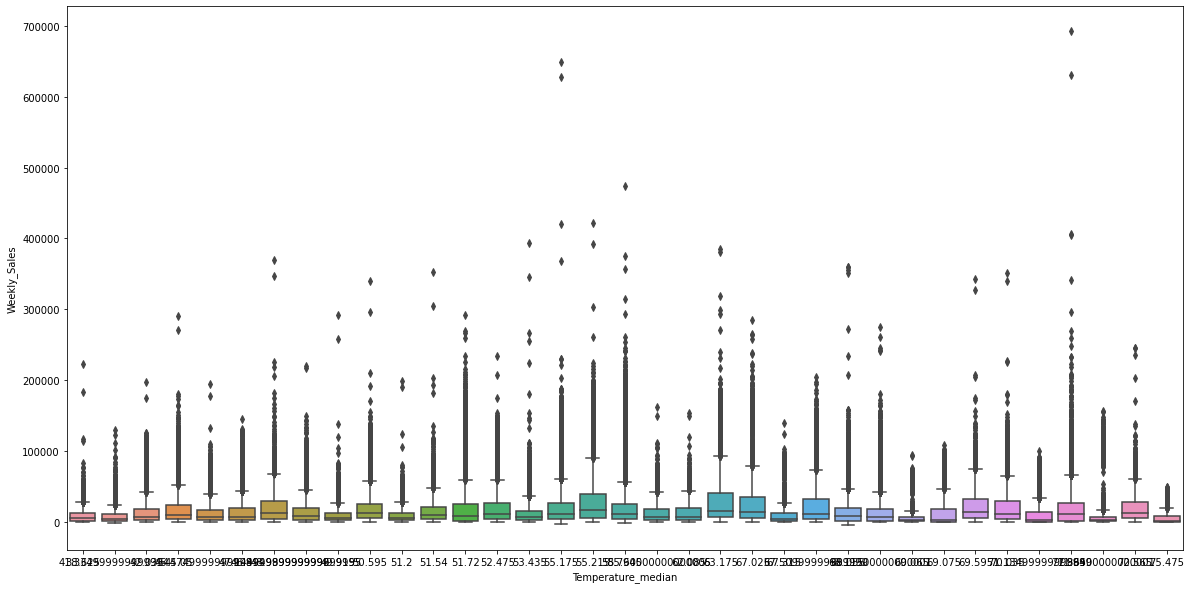

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot('Temperature_median','Weekly_Sales',data=aggr_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_min', ylabel='Weekly_Sales'>

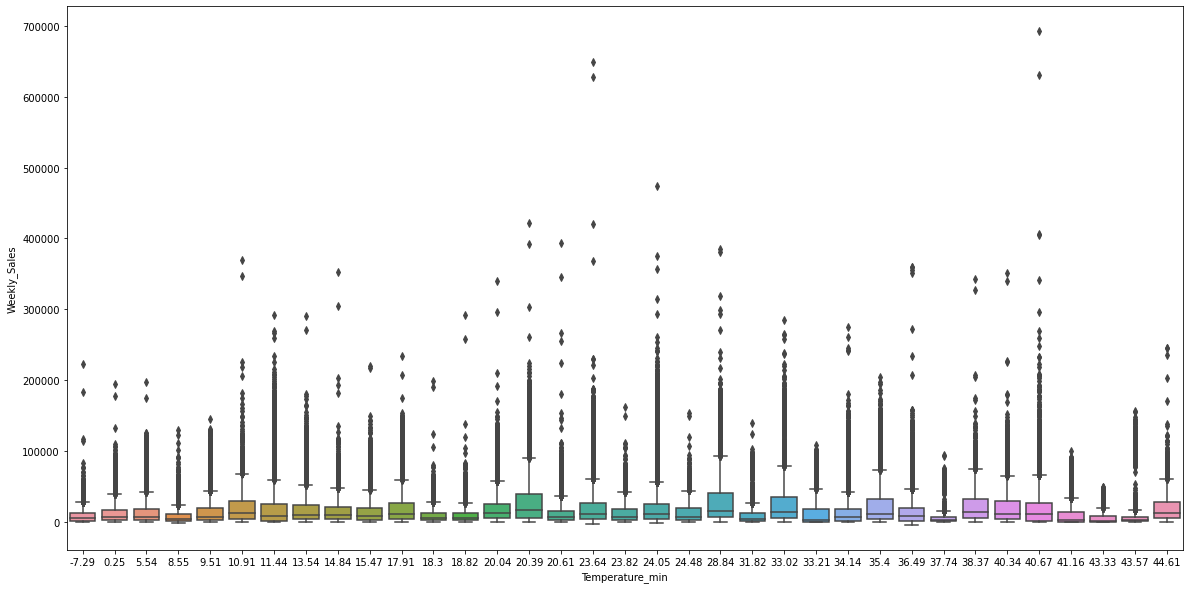

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot('Temperature_min','Weekly_Sales',data=aggr_df)

C:\Users\manish_jathan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature_max', ylabel='Weekly_Sales'>

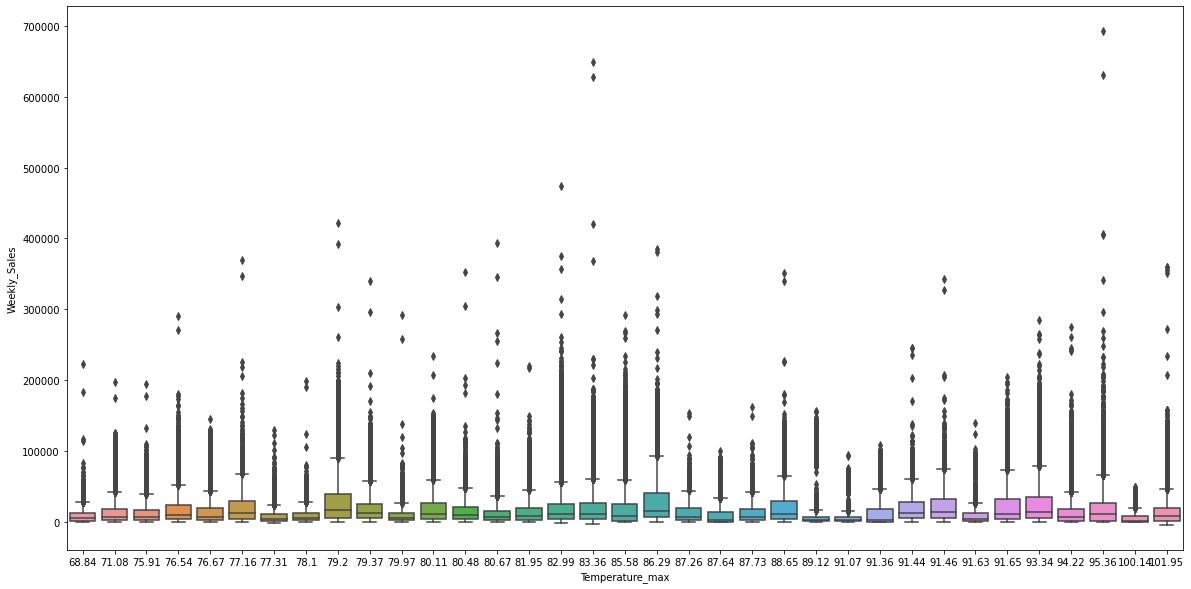

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot('Temperature_max','Weekly_Sales',data=aggr_df)

In [49]:
cols = aggr_df.select_dtypes('float64').columns
cols

Index(['Weekly_Sales', 'Temperature_min', 'Temperature_max',
       'Temperature_median', 'Temperature_sum', 'Temperature_std',
       'Temperature_skew', 'Fuel_Price_min', 'Fuel_Price_max',
       'Fuel_Price_median', 'Fuel_Price_sum', 'Fuel_Price_std',
       'Fuel_Price_skew', 'MarkDown1_min', 'MarkDown1_max', 'MarkDown1_median',
       'MarkDown1_sum', 'MarkDown1_std', 'MarkDown1_skew', 'MarkDown2_min',
       'MarkDown2_max', 'MarkDown2_median', 'MarkDown2_sum', 'MarkDown2_std',
       'MarkDown2_skew', 'MarkDown3_min', 'MarkDown3_max', 'MarkDown3_median',
       'MarkDown3_sum', 'MarkDown3_std', 'MarkDown3_skew', 'MarkDown4_min',
       'MarkDown4_max', 'MarkDown4_median', 'MarkDown4_sum', 'MarkDown4_std',
       'MarkDown4_skew', 'MarkDown5_min', 'MarkDown5_max', 'MarkDown5_median',
       'MarkDown5_sum', 'MarkDown5_std', 'MarkDown5_skew', 'CPI_min',
       'CPI_max', 'CPI_median', 'CPI_sum', 'CPI_std', 'CPI_skew',
       'Unemployment_min', 'Unemployment_max', 'Unemployment_me

### Let's look at the MarkDowns

Text(0.5, 1.0, 'DistPlot of MarkDown5')

<Figure size 1440x720 with 0 Axes>

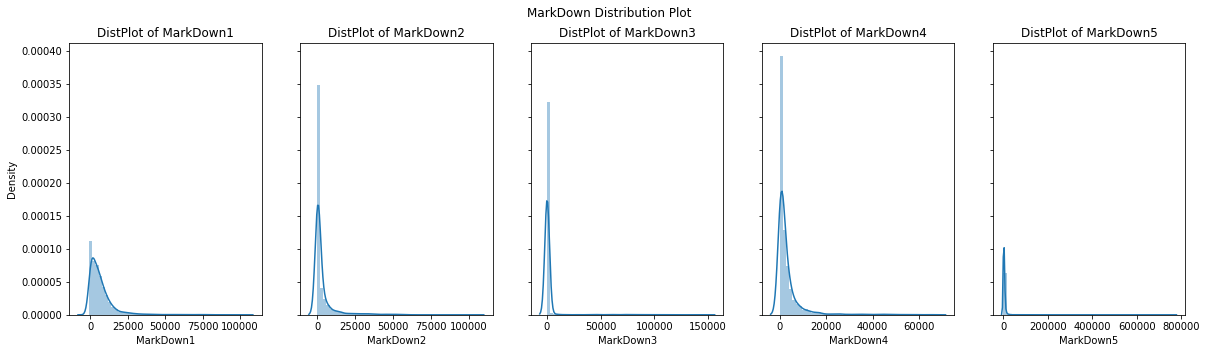

In [19]:
plt.figure(figsize=(20,10))

fig,axes = plt.subplots(1,5,figsize=(20,5),sharey=True)
fig.suptitle("MarkDown Distribution Plot")

sns.distplot(features_df['MarkDown1'],ax = axes[0])
axes[0].set_title('DistPlot of MarkDown1')

sns.distplot(features_df['MarkDown2'],ax = axes[1])
axes[1].set_title('DistPlot of MarkDown2')

sns.distplot(features_df['MarkDown3'],ax = axes[2])
axes[2].set_title('DistPlot of MarkDown3')

sns.distplot(features_df['MarkDown4'],ax = axes[3])
axes[3].set_title('DistPlot of MarkDown4')

sns.distplot(features_df['MarkDown5'],ax = axes[4])
axes[4].set_title('DistPlot of MarkDown5')

Text(0.5, 1.0, 'MarkDown5')

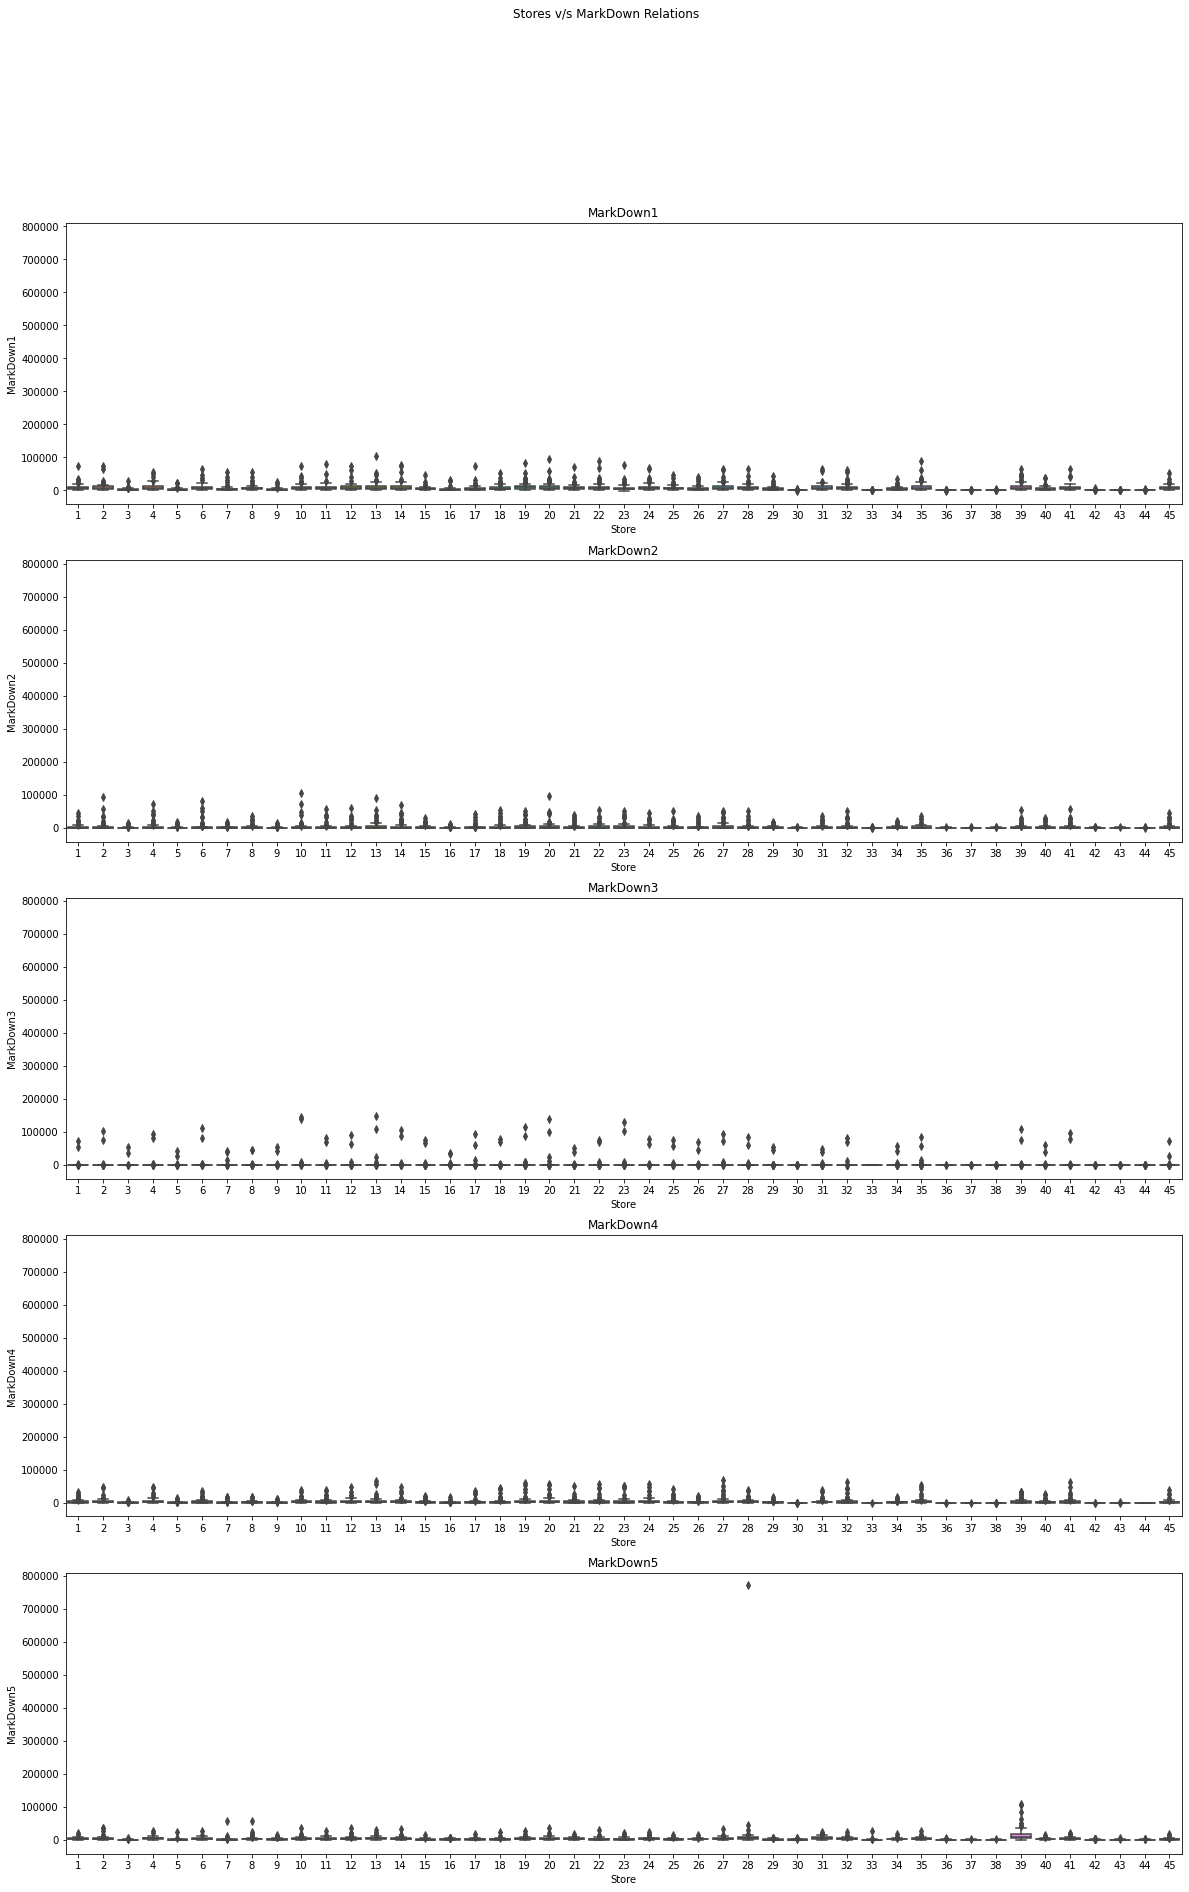

In [21]:

fig,axes = plt.subplots(5,1,figsize=(20,30),sharey=True)
fig.suptitle("Stores v/s MarkDown Relations")

sns.boxplot('Store','MarkDown1',data = features_df,ax = axes[0])
axes[0].set_title('MarkDown1')

sns.boxplot('Store','MarkDown2',data = features_df,ax = axes[1])
axes[1].set_title('MarkDown2')

sns.boxplot('Store','MarkDown3',data = features_df,ax = axes[2])
axes[2].set_title('MarkDown3')

sns.boxplot('Store','MarkDown4',data = features_df,ax = axes[3])
axes[3].set_title('MarkDown4')

sns.boxplot('Store','MarkDown5',data = features_df,ax = axes[4])
axes[4].set_title('MarkDown5')

In [31]:
## Let's look at some of the features that I am interested in
## The Lags!
## Okay but there has to be some processing done since we want the lags to be taken 
## For Every Store and Department
## Form Lag Features
for i in range(1,52): 
    train_df['Lag' + str(i)] = train_df.groupby(['Store','Dept'])['Weekly_Sales'].diff(i)

<AxesSubplot:>

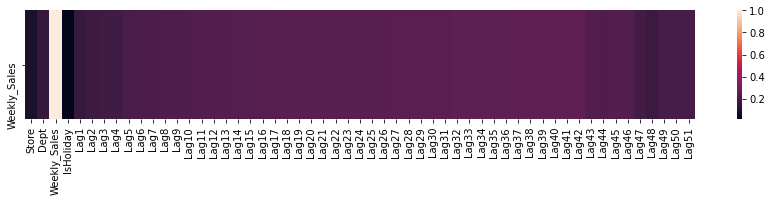

In [32]:
fig,ax = plt.subplots(figsize = (15,2))
sns.heatmap(abs(train_df.corr())[['Weekly_Sales']].T,ax=ax)